In [73]:

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import warnings
import pickle

# warnings.filterwarnings("ignore") 
df = pd.read_csv('Ethereum Historical Data.csv', delimiter=',', index_col='Date')
df = df.dropna()
df.sort_index()


,Close,Open,High,Low,Volume,Change %
Date,,,,,,
"Apr 01, 2016",11.62,11.41,11.94,11.39,22.20K,1.84%
"Apr 01, 2017",50.59,49.72,51.87,48.7,386.43K,1.75%
"Apr 01, 2018",378.75,394.1,399.46,359.49,1.24M,-3.86%
"Apr 01, 2019",141.5,141.77,143.28,140.26,11.85M,-0.20%
"Apr 01, 2020",135.66,132.88,136.56,128.93,19.45M,2.10%
...,...,...,...,...,...,...
"Sep 30, 2018",232.8,231.9,238.64,227.01,8.74M,0.40%
"Sep 30, 2019",180.35,169.28,180.52,165.59,11.93M,6.53%
"Sep 30, 2020",359.39,359.77,360.94,352.81,5.43M,-0.13%


In [74]:
df['Close'] = df['Close'].str.replace(
    ",", "", regex = False
).astype(float)
df['Open'] = df['Open'].str.replace(
    ",", "", regex = False
).astype(float)
df['High'] = df['High'].str.replace(
    ",", "", regex = False
).astype(float)
df['Low'] = df['Low'].str.replace(
    ",", "", regex = False
).astype(float)
df['Volume'] = df['Volume'].str.replace('K', '', regex = False).str.replace('M', '', regex = False).str.replace('B', '', regex = False).str.replace('-', '0', regex = False).astype(float)

df.describe()

,Close,Open,High,Low,Volume
count,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000
mean,913.755325,913.025754,943.405650,878.913963,221.761901
std,1112.980330,1112.942996,1147.197002,1073.339814,298.623690
min,6.700000,6.680000,7.320000,5.860000,0.000000
25%,155.015000,154.945000,162.102500,148.607500,5.127500
50%,327.290000,325.750000,339.080000,312.145000,19.975000
75%,1534.397500,1532.655000,1580.915000,1485.977500,453.582500
max,4808.380000,4808.340000,4864.060000,4715.430000,996.710000


In [75]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['normal-volume'] = (df['Volume'] -  df['Volume'].min()) / (df['Volume'].max()  - df['Volume'].min())
df['normal-high'] = (df['High'] -  df['High'].min()) / (df['High'].max()  - df['High'].min())
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

featureColumns = ['open-close', 'low-high', 'normal-high',]

features = df[featureColumns]
target = df['target']

In [76]:


# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=15)
X_train=features[0:100]
X_test=features[101:]
y_train=target[0:100]
y_test=target[101:]

model = XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy xboost: {accuracy:.4f}")

Accuracy xboost: 0.9399


In [77]:

filename = 'boost_classifier.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [78]:


dlrsAmount = 1000
dlrsInput = dlrsAmount
cryptoAmount = 0
closePrice = 0
list = []
investedPart = 0.5 * dlrsAmount

cryptoList = []
for index, row in df[-300:-20].iterrows():
    pr = model.predict([row[featureColumns]])
    predicted = pr[:][0]
    closePrice = row['Close']
    if(predicted == 1):
        if dlrsAmount and cryptoAmount == 0:
            list.append(dlrsAmount)
            cryptoAmount = cryptoAmount + investedPart / closePrice
            dlrsAmount = dlrsAmount - investedPart
    else:
        if cryptoAmount:
            cryptoList.append(cryptoAmount)
            dlrsAmount = dlrsAmount + cryptoAmount * closePrice
            cryptoAmount = 0
            if cryptoAmount > 1:
                print(1111111111111111, cryptoAmount)
  
    
df = pd.DataFrame(list)
crypto = pd.DataFrame(cryptoList)

# df.describe()
# df.tail(2)


dlrsAmount 2964.985883676749
dlrsInput 1000
cryptoAmount 0
cryptoAmount * dlrsAmount 0.0


<Axes: >

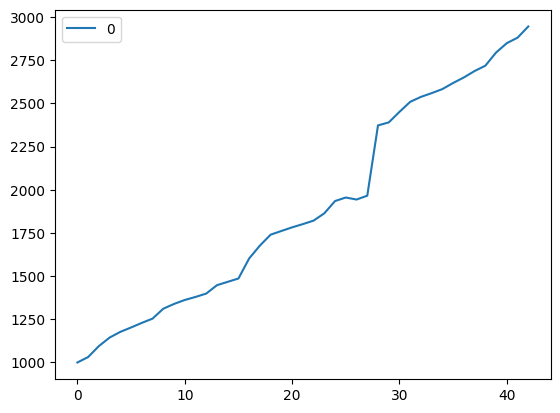

In [79]:
print('dlrsAmount', dlrsAmount)
print('dlrsInput', dlrsInput)
print('cryptoAmount', cryptoAmount)
print('cryptoAmount * dlrsAmount', cryptoAmount * closePrice)
df.plot()

<Axes: >

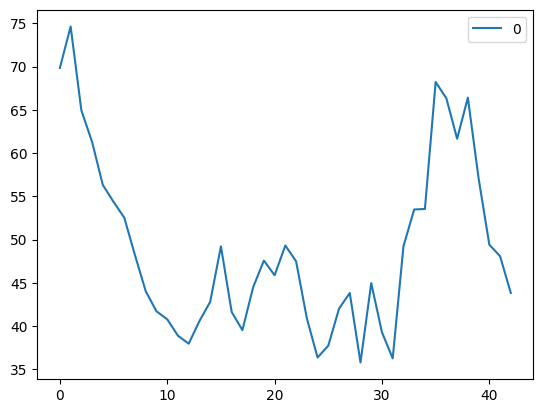

In [80]:
crypto.plot()